<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

# Lab 5: Sample Project

# Sample Project

We're going to walk through an example project to get you thinking about what you may want to do for 315 (or beyond!). It's tempting to take on super ambitious projects that you see in public media or Twitter, but it's a good idea to stick with something relatively simple to begin with, since getting a neural network trained and consistently is already reasonably difficult to do.

Let's start by getting a dataset!

## Getting Data
In the real world, you'll often have to both define a problem *and* find the data to use for answering said question. Getting a feel for this process is the main goal for the project, so we'll be walking through an example of how you may want to approach this.

One of the main problems with starting out is constraining the space: there are *so many* interesting directions to go in that it is all too easy to freeze up and get nowhere. So, we have to start by constraining the problem space. It is always a better idea to constrain the space too much than too little: if you do the former, you will get an answer to your initial inquiry (and a confidence boost!) and can always extend that question with further questions as you are interested. Anyway, let's jump into an actual problem.

We highly recommend you use Kaggle (or some other well-known public data source) to curate your data: you will find that much of your initial work in data analysis is unglamorous data munging to get the right formats and yada yada. So, we want to minimize that time, since it isn't the focus of this class, and get to the methodology.

Feel free to take on something more challenging, but realize it will likely be more difficult to get something working than you may expect. Some non-Kaggle ideas include things like *very basic* chess bot (i.e. only plays end games).

## Kaggle
Let's take a look at Kaggle: https://www.kaggle.com/ and how you may go about finding a dataset. Many interesting datasets are in the "Competition" section.

We'll be doing our analysis on this https://www.kaggle.com/competitions/birdclef-2021/data dataset (only a subset of it here, since the entire dataset is quite large). Ultimately, you will have to train on moderately large datasets, for which you should make sure to train on the GPU (otherwise analysis will take forever).

Your project should go through three main phases (after choosing a dataset):
- **Data exploration**: find properties of the data: distributions, any weird missing points, how the data generally "looks" (this will be pretty different comparing visual data from tabular data from audio data)
- **Choose appropriate model structures for the dataset**: we haven't talked about it much yet, but there are layers that are more specific to particular data formats (convolutions for images, recurrent layers for text/audio) that you will definitely want to exploit for your particular data choice. It is always useful to try the simple thing first (since getting the complicated thing to work is usually pretty finnicky), so starting with Dense layers or even a linear/logistic regression is a great starting point (if for no other reason than to serve as a point of comparison for your more complicated models). 
- **Fine tuning**: this should always be the *last* thing you do in your analysis and includes things like tuning the learning rate, changing the widths of various layers, and so on. While these things can make some difference in the final result, it will usually be dramatically less than that which will result from properly accounting for the previous two steps. So, definitely don't start doing this step prematurely: you will end up wasting a lot of time if you fine-tune a model that is simply not suited for the job.

With those steps laid out, let's see how to do them in practice!

## Data Setup
Let's load in the data to get us started!

In [ ]:
# No need to import deep learning yet (just exploring the data)
import numpy as np
import pandas as pd

In [ ]:
bird_to_fns = {
  "grycat": [
      "XC31055.ogg",
      "XC17041.ogg",
      "XC31053.ogg",
      "XC31208.ogg",
      "XC53194.ogg",
      "XC31058.ogg",
      "XC53193.ogg",
      "XC53192.ogg",
      "XC16962.ogg",
      "XC16963.ogg",
  ],
  "acafly": [
      "XC109605.ogg",
      "XC11209.ogg",
      "XC6671.ogg",
      "XC31224.ogg",
      "XC31225.ogg",
      "XC127032.ogg",
      "XC129974.ogg",
      "XC31063.ogg",
      "XC51408.ogg",
      "XC51409.ogg",
  ],
  "nutwoo": [
      "XC161354.ogg",
      "XC125258.ogg",
      "XC161355.ogg",
      "XC161357.ogg",
      "XC161356.ogg",
      "XC161352.ogg",
      "XC161351.ogg",
      "XC125300.ogg",
      "XC179379.ogg",
      "XC124487.ogg",
  ],
}

In [ ]:
import os
import glob
import urllib.request

for bird in bird_to_fns:
  if os.path.isdir(bird):
    files = glob.glob(f"{bird}/*")
    for f in files:
        os.remove(f)
  else:
    os.makedirs(bird)
  for fn in bird_to_fns[bird]:
    url = f"https://github.com/yashpatel5400/birds/raw/main/{bird}/{fn}"
    urllib.request.urlretrieve(url, f"{bird}/{fn}")

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Exploration
Let's now take a look at what this data actually looks like!

In [ ]:
import librosa

In [ ]:
result = librosa.load(sample_fn)

In [ ]:
first_vale, _ = result

In [ ]:
sample_fn = "acafly/XC109605.ogg"
freqs, _ = librosa.load(sample_fn)

In [ ]:
#############################################################################
# Task
# • What is the type of freqs? What about its components/shape?
#############################################################################

# Replace "____" statements with your code
print(type(freqs))
print(freqs.dtype)
print(type(freqs[0]))
print(freqs.shape)

<class 'numpy.ndarray'>
float32
<class 'numpy.float32'>
(1404025,)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
plt.rcParams["axes.grid"] = False

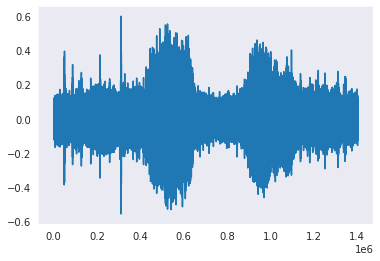

In [ ]:
#############################################################################
# Task
# • Plot the freqs array
#############################################################################

# Replace "____" statements with your code
plt.plot(freqs)

Great! This looks like a standard waveform, as you might expect. Let's check some more properties for this individual datapoint and then we can look at some more "summative" quantities of the dataset.

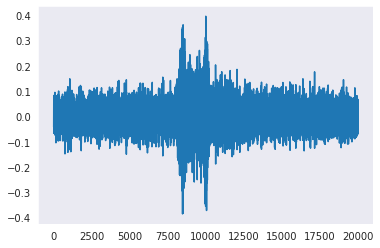

In [ ]:
#############################################################################
# Task
# • Plot just values [40000,60000] from the freqs array
#############################################################################

# Replace "____" statements with your code
plt.plot(freqs[40_000:60_000])

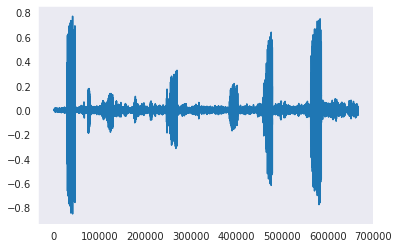

In [ ]:
#############################################################################
# Task
# • Repeat the above (loading and plotting) for any file from the "nutwoo" folder
#############################################################################

# Replace "____" statements with your code
sample_fn = "nutwoo/XC125258.ogg"
freqs, _ = librosa.load(sample_fn)
plt.plot(freqs)

Great! So we have a sense of how individual files look like. Let's load these all into a single dictionary to make it a bit easier to deal with:

In [ ]:
#############################################################################
# Task
# • Fill in the missing spots to load everything into a "bird_calls" dictionary
#############################################################################

# Replace "____" statements with your code
bird_calls = {}
for bird in bird_to_fns:
  if bird not in bird_calls:
    bird_calls[bird] = []
  for fn in bird_to_fns[bird]:
    freqs, _ = librosa.load(os.path.join(bird, fn))
    bird_calls[bird].append(freqs)

Now everything's loaded into this dictionary! Just to make sure we have everything clear and that everything is as expected, go ahead and repeat the tasks two above but now just load the data from this dictionary.

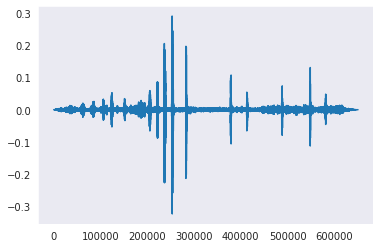

In [ ]:
#############################################################################
# Task
# • Repeat the "nutwoo" analysis instead directly using the data from bird_calls
#############################################################################

# Replace "____" statements with your code
freqs = bird_calls["nutwoo"][3]
plt.plot(freqs)

Let's do some larger scale analysis (i.e. get statistics for each of the birds). Notice how we *still* haven't touched deep learning or Tensorflow: you should expect the same will happen in your project! The first portion of the project (which is just as important as the second) will likely involve little if any deep learning.

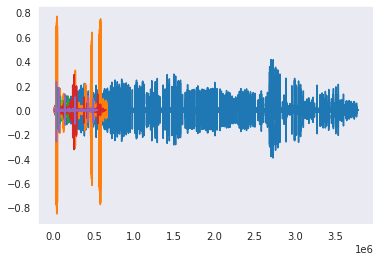

In [ ]:
#############################################################################
# Task
# • Plot the first 5 bird calls from nutwoo. Do they look similar?
#############################################################################

# Replace "____" statements with your code
for i in range(5):
  plt.plot(bird_calls["nutwoo"][i])

Huh! Looks like the data are of different lengths! As mentioned, these datasets will likely not be in *exactly* the format you'd like. This is mostly because the datasets can be used for multiple purposes, so the curators don't want to make any assumptions and pigeonhole the dataset to just be used for a single purpose. 

We want to have all these be the *same length*, so let's start by preprocessing the dataset.

In [ ]:
#############################################################################
# Task
# • Find the min_length across the dataset
#############################################################################

# Replace "____" statements with your code
min_length = float("inf")
for bird in bird_calls:
  for bird_call in bird_calls[bird]:
    min_length = min(min_length, len(bird_call))

print(min_length)

139129


In [ ]:
#############################################################################
# Task
# • Chop all the audio signals to be of the common min_length
#############################################################################

# Replace "____" statements with your code
preprocessed_bird_calls = {}
for bird in bird_calls:
  if bird not in preprocessed_bird_calls:
    preprocessed_bird_calls[bird] = []
  for bird_call in bird_calls[bird]:
    preprocessed_bird_calls[bird].append(bird_call[:min_length])

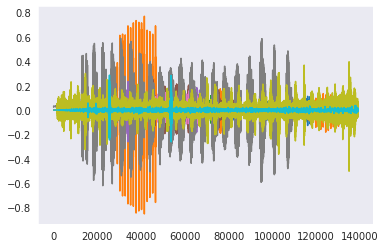

In [ ]:
#############################################################################
# Task
# • Plot the first 5 bird calls from the preprocessed nutwoo. How does this compare?
#############################################################################

# Replace "____" statements with your code
for bird_call in preprocessed_bird_calls["nutwoo"]:
  plt.plot(bird_call)

Much better! For an actual project, you may want to look into things like removing extraneous noise from the dataset (similar to outlier removal). We'll ignore that for now. However, we will look at normalizing the data, which is very common to do, although it takes different forms in different applications. One common way to start is by looking at distribution plots:

KeyboardInterrupt: ignored

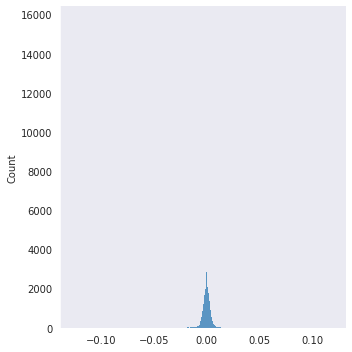

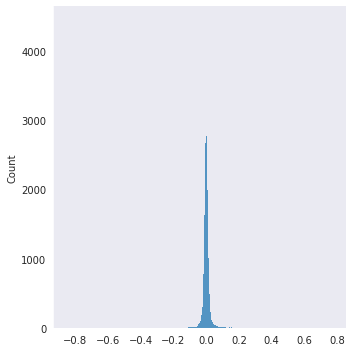

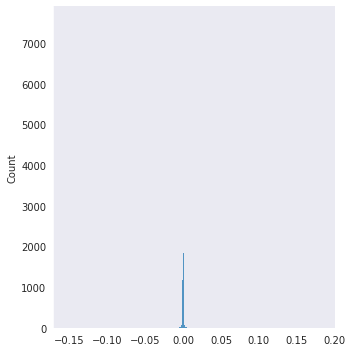

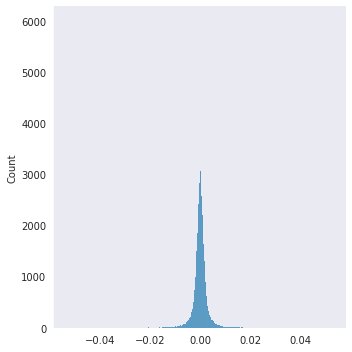

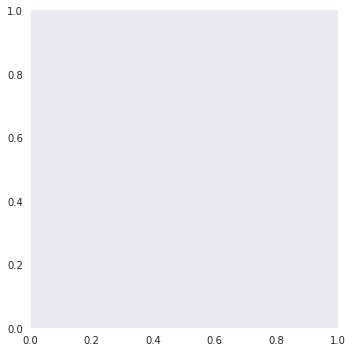

In [ ]:
#############################################################################
# Task
# • Use sns.distplot to plot the distributions of the first 5 nutwoo calls
#############################################################################

# Replace "____" statements with your code
for bird_call in preprocessed_bird_calls["nutwoo"][:5]:
  sns.displot(bird_call)

Well... that's pretty useless! But this is probably because most of our data are 0 (or close to it). So, let's filter out these low values and see how the data looks then:

In [ ]:
x = np.random.random(10)

In [ ]:
print(x[x > 0.5])

[0.7186005  0.87580863 0.57408759 0.93106216 0.93055869]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(-0.25, 0.25)

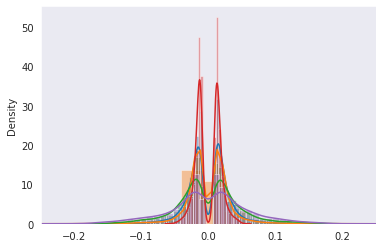

In [ ]:
#############################################################################
# Task
# • Filter all values with np.abs(x) < 0.01 and replot this with sns.distplot
#############################################################################

# Replace "____" statements with your code
for bird_call in preprocessed_bird_calls["nutwoo"][:5]:
  sns.distplot(bird_call[np.abs(bird_call) > 0.01])
plt.xlim([-.25, .25])

Much better! So it looks like all the data are bimodal (which makes sense, given that each "up" has a corresponding "down" in the data. In fact, this may lead you to the following idea: maybe we can just consider the *amplitude* instead of the original values that are recorded!

Now we're getting somewhere!

In [ ]:
#############################################################################
# Task
# • Define the amplitudes as the np.abs of the original frequencies
# • Replot the sns.distplot of the amplitudes for the first nutwoo calls
#############################################################################

# Replace "____" statements with your code
for bird_call in ____:
  sns.distplot(____)
plt.xlim([0, .25])

Let's repeat this for the other bird calls

In [ ]:
#############################################################################
# Task
# • Repeat the above for acafly (should be pretty straightforward!)
#############################################################################

# Replace "____" statements with your code
for bird_call in preprocessed_bird_calls[____][:5]:
  sns.distplot(np.abs(bird_call[np.abs(bird_call) > 0.01]))
plt.xlim([0, .25])

These look pretty different! Well, now we're onto an interesting research question: can we distinguish a bird just from the amplitudes of the waveform? One thing we may want to look at are different *representations* of the data: you could just directly work with the raw amplitude values **or** try doing some Fourier transform to the data and working with that instead. These sorts of choices are the things you could try exploring in your project for instance.

<!-- There is a bit more preprocessing we should do before we get to answering this question. First of all, between different calls for the *same* bird, we wouldn't expect there to really be much difference. The difference in amplitudes is likely just because of arbitrary experimental decision (like, how loud that *particular* bird was or how close it was to the microphone). -->

<!-- So, let's normalize the calls *per bird*. That way, we don't end up drawing some erroneous conclusion based on factors that are totally irrelevant. -->

## Train/Test
For now, let's just stick with the raw dataset and move onto the next thing: creating a train/test split. In real projects, you'll want to do a train/test/val split, but we'll just the former to make it simple. Let's get started!

In [ ]:
#############################################################################
# Task
# • Construct a matrix X and vector y which has *all* the data. The matrix X
# should have one row *per* datapoint (and should be values from preprocessed_bird_calls)
# The y should be the corresponding bird. Note that you'll want to replace the 
# actual bird name with a numeric identifier (i.e. 0 = acafly, 1 = grycat, 2 = nutwoo)
# 
# Hint: It is *much* easier to deal with vanilla Python lists and then convert
# that list to a numpy array after than to directly construct the array
#############################################################################

# Replace "____" statements with your code
bird_to_id = {
    "acafly": 0,
    "grycat": 1,
    "nutwoo": 2,
}

X = []
y = []

for bird in preprocessed_bird_calls:
  for bird_call in preprocessed_bird_calls[bird]:
    X.append(bird_call)
    y.append(bird_to_id[bird])

X = np.array(X)
y = np.array(y)

In [ ]:
#############################################################################
# Task
# • Verify the shape of X and y to make sure they look reasonable
#############################################################################
print(X.shape)
print(y.shape)

(30, 139129)
(30,)


In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Now that we have all the data in one place and well formatted, let's make our data split. One *key* thing we must do is shuffle the data though! If we just naively split this dataset now (taking the "beginning" to be the training set and the end to be the testing), *all* the testing data will be nutwoo data, which is not what we want. We instead want something that's evenly split.

In [ ]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [ ]:
#############################################################################
# Task
# • Using unison_shuffled_copies, shuffle the two arrays X, y. Make sure to
# redefine X, y as the outputs of this function call!
#############################################################################
X, y = unison_shuffled_copies(X, y)

In [ ]:
#############################################################################
# Task
# • Check y to make sure it is actually shuffled
#############################################################################
y

array([2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 2, 0])

In [ ]:
#############################################################################
# Task
# • Construct X_train, y_train, X_test, y_test as being the first 25 and last 5
# values from the two arrays respectively
#############################################################################
X_train = X[:25]
y_train = y[:25]

X_test, y_test = X[25:], y[25:]

Now we have a dataset and a train/test split! We're ready to get going on the actual analysis

## Logistic Regression
Let's see how a baseline of logistic regression does! Remember, we have **WAY** more features than datapoints, so we're going to need to regularize this dataset (just using something like L2 regularization). Let's start with a logistic regression to get a baseline performance. Remember: by default, if we started with just *random guessing* we should get about 1/3 of the datapoints correct. Since our test set is 5, that means if we haven't learned **anything** we should expect about 2 correct. Unfortunately, 5 is so small a testing set, that 2 vs 3 could just happen because of chance, but in your datasets, you'll likely be working with more data than we have here.


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#############################################################################
# Task
# • Use a LogisticRegression to fit X_train to y_train
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#############################################################################
clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

#############################################################################
# Task
# • Compute the accuracy of your predictions on the test set
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
#############################################################################
accuracy_score(y_test, clf.predict(X_test))

0.2

Alright, that seems like a good baseline to compare to! Remember: always try out the simple things first to see what you should expect to get with the "fancier" techniques you'll be using soon. This will help you debug and know whether the system is working at all or not.

## Deep Learning
At long last, we turn to deep learning. Remember: you should only start using Tensorflow once you have a solid grasp on the data and have done some basic exploration/cleanup

In [ ]:
import tensorflow as tf

Our goal is to do **classification** of the bird calls into three sets (acafly, grycat, nutwoo). Let's use what we learned last week to do this!

In [ ]:
#############################################################################
# Task
# • Construct a Sequential model with 3 Dense layers and 2 Dropout layers. 
# Make sure to think through how many neurons the output layer should have!
#############################################################################
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3))

In [ ]:
#############################################################################
# Task
# • Run the model on a sample data point from X_train. Remember, we haven't
# trained anything, so you shouldn't expect anything meaningful!
#############################################################################
print(model(np.expand_dims(X_train[0], axis=0)))

tf.Tensor([[ 0.02078278  0.01154071 -0.05518719]], shape=(1, 3), dtype=float32)


In [ ]:
#############################################################################
# Task
# • Compile the model with the appropriate loss function. Remember from_logits!!!
# Add "accuracy" as metrics
#############################################################################
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])

In [ ]:
#############################################################################
# Task
# • Train the model (use 10 epochs)
#############################################################################
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.1341 - accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 1.6081 - accuracy: 0.4800
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 3.1441 - accuracy: 0.6800
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 2.2965 - accuracy: 0.6400
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 3.0418 - accuracy: 0.6800
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 1.9401 - accuracy: 0.6400
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 4.2663 - accuracy: 0.6400
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 2.0876 - accuracy: 0.6400
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 5.0734 - accuracy: 0.7600
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 3.3321 - accuracy: 0.6800


In [ ]:
#############################################################################
# Task
# • Evaluate the model on the testing set
#############################################################################
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

1/1 [==============================] - 0s 135ms/step - loss: 1.2945 - accuracy: 0.6000
0.6000000238418579


So...it's a bit tough to say if that actually worked (since we have such a small dataset here)! But that's at least how you might begin this project